In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
housing = datasets.load_boston()


In [3]:
housing # dic형태

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [6]:
# dic key 값
housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [18]:
# df로 변환
data= pd.DataFrame(housing['data'], columns=housing['feature_names'])
target=pd.DataFrame(housing['target'], columns=['price'])

print(data.shape)
print(target.shape)

(506, 13)
(506, 1)


In [19]:
# df 결합 
df = pd.concat([data, target], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [21]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

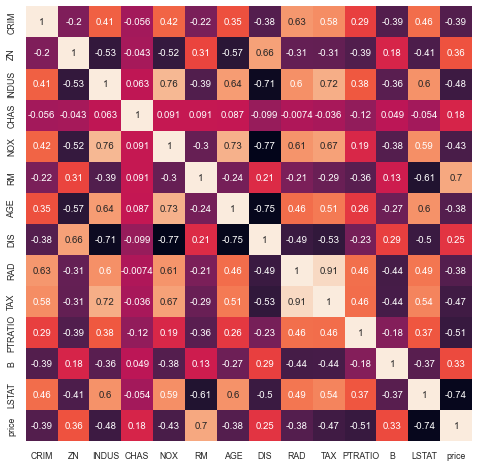

In [23]:
df_corr = df.corr()

plt.figure(figsize=(8,8))
sns.set(font_scale=0.8)
sns.heatmap(df.corr(), annot=True, cbar=False)
plt.show()

In [24]:
# 변수 간의 상관관계 분석 - Target 변수와 상관관계가 높은 순서대로 정리
corr_order = df_corr.loc[:'LSTAT', 'price'].abs().sort_values(ascending=False)
corr_order

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: price, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
# train, test 분할

X_train, X_test, y_train, y_test = train_test_split(data, target, 
                                                    test_size=0.2,
                                                   shuffle=True,
                                                   random_state=12)

In [29]:
# 분할 데이터 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404, 1) (102, 1)


In [61]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [62]:
y_pred = lr.predict(X_test)
# y_pred
y_pred[:5]

array([[21.91255819],
       [18.30810393],
       [ 7.50219553],
       [30.56672721],
       [32.91643787]])

In [34]:
y_test

,price
334,20.7
394,12.7
404,8.5
236,25.1
307,28.2
...,...
458,14.9
263,31.0
433,14.3
275,32.0


In [38]:
# 정확도 계산 
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.4f" % mse)

MSE: 20.5581


In [39]:
rmse = np.sqrt(mse)
rmse

4.534098767586549

In [40]:
r2_score(y_test,y_pred)

0.7484031678924543

In [65]:
print("회귀계수(기울기):", np.round(lr.coef_,1))
print("상수항(절편):", np.round(lr.intercept_,1))

회귀계수(기울기): [[ -0.1   0.    0.    3.  -18.1   3.7   0.   -1.4   0.3  -0.   -0.8   0.
   -0.6]]
상수항(절편): [34.1]


In [67]:
coef = pd.Series(data=np.round(lr.coef_,2), index=X_train.columns)
coef

In [52]:
X_train.columns.to_list()

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

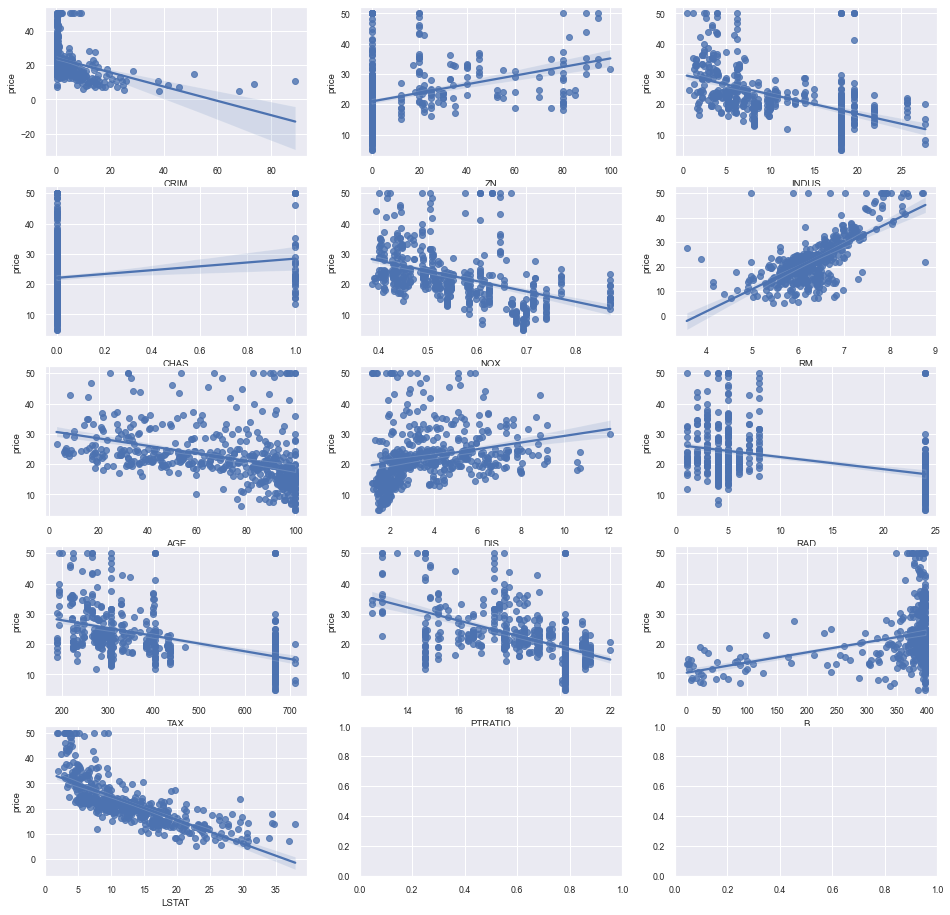

In [56]:
fig, axs = plt.subplots(figsize=(16,16),ncols=3, nrows=5)

x_features=X_train.columns.to_list()


for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y='price', data=df, ax=axs[row][col])

In [69]:
df.head(1)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [73]:
lr.predict([[0.001, 15, 1, 0, 0.59, 5, 10, 0, 1, 10, 5, 100, 1]])

array([[39.38115116]])

In [72]:
train_predict = lr.predict(X_train)

In [75]:
r2_score(y_train, train_predict)

0.736159238423712

In [76]:
mse_train = mean_squared_error(y_train, train_predict)
mse_train

22.427871876091487

In [78]:
rmse_train = np.sqrt(mse_train)
rmse_train

4.735807415435248

In [79]:
one_person = input('CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT	')
one_person

CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT	0.001,15,1,0,0.59,5,10,0,1,10,5,100,1


'0.001,15,1,0,0.59,5,10,0,1,10,5,100,1'

In [89]:
one_li =list(map(float, one_person.split(',')))

In [92]:
data2=[one_li]

In [93]:
lr.predict(data2)

array([[39.38115116]])

In [97]:
data_list=[]

crim = float(input('CRIM >>' ))
zn =input('ZN >>')
indus=input('INDUS >>')
chas=input('CHAS >>')
nox=input('NOX >>')
rm=input('RM >>')
age=input('AGE >>')
dis=input('DIS >>')
rad=input('RAD >>')
tax=input('TAX >>')
ptratio=input('PTRATIO >>')
b=input('B >>')
lstat=input('LSTAT >>')

# 서비스를 할 때 str로 받아옴 ; clinet에서 변환 x
# 나중에 서버에서 convert 해줘야함 
# 그러므로 위의 방식이 서비스에서는 맞다

data_list.append(crim)
data_list.append(zn)
data_list.append(indus)
data_list.append(chas)
data_list.append(nox)
data_list.append(rm)
data_list.append(age)
data_list.append(dis)
data_list.append(rad)
data_list.append(tax)
data_list.append(ptratio)
data_list.append(b)
data_list.append(lstat)

for i in range(len(data_list)) : 
    data_list[i] = float(data_list[i])

# print(type(data_list[1]))

# data_list.append(float(crim))
# data_list.append(float(zn))
# data_list.append(float(indus))
# data_list.append(float(chas))
# data_list.append(float(nox))
# data_list.append(float(rm))
# data_list.append(float(age))
# data_list.append(float(dis))
# data_list.append(float(rad))
# data_list.append(float(tax))
# data_list.append(float(ptratio))
# data_list.append(float(b))
# data_list.append(float(lstat))

data3 = [data_list]
#'0.001,15,1,0,0.59,5,10,0,1,10,5,100,1'

CRIM >>0.001
ZN >>15
INDUS >>1
CHAS >>0
NOX >>0.59
RM >>5
AGE >>10
DIS >>0
RAD >>10
TAX >>5
PTRATIO >>100
B >>1
LSTAT >>1
<class 'float'>


In [100]:
# 다른 방법 

data_list2 =[crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat]

data_list2 = list(map(lambda x: float(x), data_list))
data_list2

[0.001, 15.0, 1.0, 0.0, 0.59, 5.0, 10.0, 0.0, 10.0, 5.0, 100.0, 1.0, 1.0]

In [95]:
lr.predict(data3)

array([[39.38115116]])